# Settings:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
import os

## Read df:

In [3]:
df = pd.read_csv(os.path.join('Data', 'info.csv'))

## Check df:

In [4]:
for _, row in df.iterrows():
    if row['genre'] == "hiphiop":
        row['genre'] = "hiphop"
    if row['genre'] == "electronic ":
        row['genre'] = "electronic"

df.head()

,link,type_of_source,time_from,time_to,genre
0,https://www.youtube.com/watch?v=UKq-Uz2ZTPw&li...,Show,00:00:20,00:03:43,hiphop
1,https://www.youtube.com/watch?v=nerSkOMcZaA&li...,Show,00:00:34,00:04:31,pop
2,https://www.youtube.com/watch?v=qBX_iXOmQ_4&li...,Show,00:00:39,00:03:50,pop
3,https://www.youtube.com/watch?v=Y_DFEPFCmTg&li...,Show,00:01:14,00:04:36,metal
4,https://www.youtube.com/watch?v=pWkB9NZi7tw&li...,Show,00:00:58,00:04:35,pop


## Count durations:

In [5]:
dur_list = []
for _, row in df.iterrows(): 
    begin = datetime.strptime(row['time_from'], "%H:%M:%S")
    end = datetime.strptime(row['time_to'], "%H:%M:%S")
    duration = (end - begin).total_seconds()
    dur_list.append(duration)

dur_df = pd.DataFrame({"duration": dur_list})

complete_df = pd.concat([df, dur_df], axis=1)

## Calculate source durations:

In [6]:
dur_src_dict = { "Show": 0,
                 "Contest": 0,
                 "Concert": 0}
for _, row in complete_df.iterrows():
    duration = row['duration']
    prev_dur = dur_src_dict[row['type_of_source']]
    duration += prev_dur
    dur_src_dict.update({row['type_of_source']: duration})

print(dur_src_dict)

{'Show': 32788.0, 'Contest': 11593.0, 'Concert': 61606.0}


## Calculate genres durations:

In [7]:
genre_dict = {}

for _, row in complete_df.iterrows():
    duration = row['duration']
    if row['genre'] in genre_dict:
        genre_dict.update({row['genre']: duration + genre_dict[row['genre']]})
    else:
        genre_dict.update({row['genre']: duration})

print(genre_dict)

{'hiphop': 13360.0, 'pop': 48780.0, 'metal': 2496.0, 'rock': 21695.0, 'electronic': 2634.0, 'jazz': 254.0, 'indi': 5051.0, 'blues': 3266.0, 'classical': 949.0, 'folk': 3920.0, 'country': 2332.0, 'disco': 403.0, 'reggae': 847.0}


In [8]:
# check tyops (old)

for _, row in complete_df.iterrows():
    if row['genre'] == "electronic " or row['genre'] == "hiphiop":
        print(row)

# Make plots:

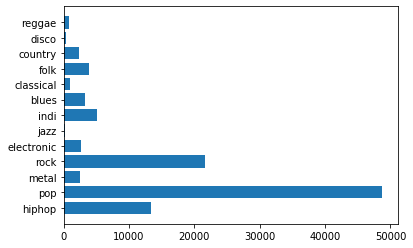

In [9]:
plt.barh(range(len(genre_dict)), genre_dict.values(), tick_label=list(genre_dict.keys()), align='center')
plt.savefig(os.path.join('Plots', 'genres.png'))
plt.show()

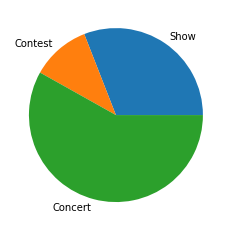

In [10]:
plt.pie(list(dur_src_dict.values()), labels=list(dur_src_dict.keys()))
plt.savefig(os.path.join('Plots', 'Sources.png'))
plt.show()

## Split 70/30

In [11]:
train, test = train_test_split(complete_df, test_size=0.3)

In [16]:
def source_dict(data_frame):
    dur_src_dict = { "Show": 0,
                     "Contest": 0,
                     "Concert": 0}
    for _, row in data_frame.iterrows():
        duration = row['duration']
        prev_dur = dur_src_dict[row['type_of_source']]
        duration += prev_dur
        dur_src_dict.update({row['type_of_source']: duration})

    return dur_src_dict

def genres_dict(data_frame):
    genre_dict = {}

    for _, row in data_frame.iterrows():
        duration = row['duration']
        if row['genre'] in genre_dict:
            genre_dict.update({row['genre']: duration + genre_dict[row['genre']]})
        else:
            genre_dict.update({row['genre']: duration})
    return genre_dict

## Plots:

In [17]:
def make_plots(name, data_frame):
    genre_dict = genres_dict(data_frame)
    dur_src_dict = source_dict(data_frame)
    plt.barh(range(len(genre_dict)), genre_dict.values(), tick_label=list(genre_dict.keys()), align='center')
    plt.savefig(name + 'genres.png')
    plt.show()
    plt.pie(list(dur_src_dict.values()), labels=list(dur_src_dict.keys()))
    plt.savefig(name + 'Sources.png')
    plt.show()

## Train plots:

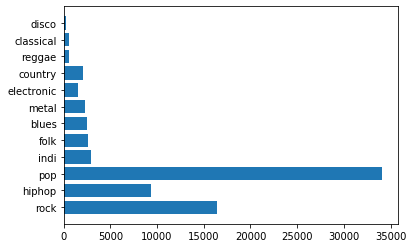

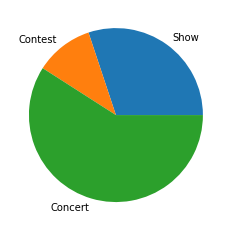

In [14]:
make_plots(os.path.join('Plots', 'train_'), train)

## Test plots:

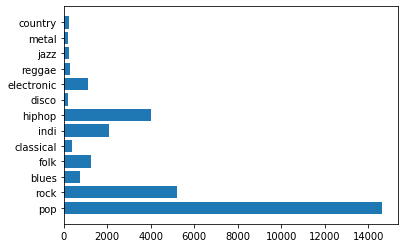

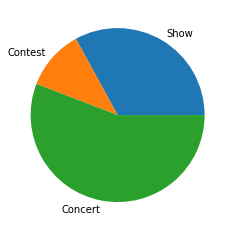

In [15]:
make_plots(os.path.join('Plots', 'test_'), test)

# Split datasets:

In [11]:
df = pd.read_csv(os.path.join('Data', 'infoPPP.csv'), encoding='cp1251')
df.head()

,name,type_of_source,pop,rock,indi,hiphop,metal,electronic,folk,blues,classical,jazz,country,disco,reggae
0,2517 - Подорожник. Вечерний Ургант. 12.03.2020...,Show,0,0,0,203,0,0,0,0,0,0,0,0,0
1,2Маши - Мама я танцую.txt,Show,237,0,0,0,0,0,0,0,0,0,0,0,0
2,8_Русская_Музыкальная_Премия_Телеканала_RU_TV.txt,Show,3302,0,0,445,0,0,0,0,0,0,0,0,0
3,ANIKV feat. SALUKI - Меня не будет. Вечерний У...,Show,191,0,0,0,0,0,0,0,0,0,0,0,0
4,Apocalyptica – «Enter Sandman» (06.04.2018).txt,Show,0,0,0,0,202,0,0,0,0,0,0,0,0


In [22]:
train, test = train_test_split(df, test_size=0.2)
train, valid = train_test_split(df, test_size=0.2)

In [23]:
genres = {'pop', 'rock', 'indi', 'hiphop', 'metal', 'electronic', 'folk', 'blues', 'classical', 'jazz', 'country', 'disco', 'reggae'}


def source_dict(data_frame):
    dur_src_dict = { "Show": 0,
                     "Contest": 0,
                     "Concert": 0}
    for _, row in data_frame.iterrows():
        duration = 0
        for cur_genre in genres:
            duration += row[cur_genre]
        prev_dur = dur_src_dict[row['type_of_source']]
        duration += prev_dur
        dur_src_dict.update({row['type_of_source']: duration})

    return dur_src_dict


def genres_dict(data_frame):
    genre_dict = {}

    for _, row in data_frame.iterrows():
        for cur_genre in genres:
            dur = row[cur_genre]
            if cur_genre in genre_dict:
                genre_dict.update({cur_genre: dur + genre_dict[cur_genre]})
            else:
                genre_dict.update({cur_genre: dur})
    return genre_dict


def make_plots(name, data_frame):
    genre_dict = genres_dict(data_frame)
    dur_src_dict = source_dict(data_frame)
    plt.barh(range(len(genre_dict)), genre_dict.values(), tick_label=list(genre_dict.keys()), align='center')
    plt.savefig(name + 'genres.png')
    plt.show()
    plt.pie(list(dur_src_dict.values()), labels=list(dur_src_dict.keys()))
    plt.savefig(name + 'Sources.png')
    plt.show()

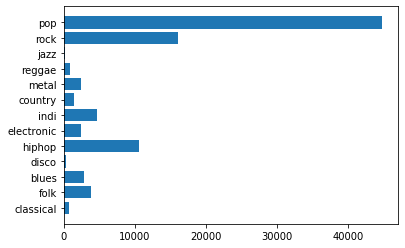

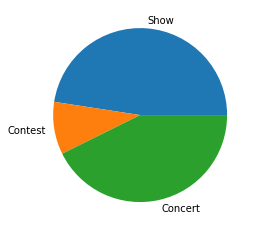

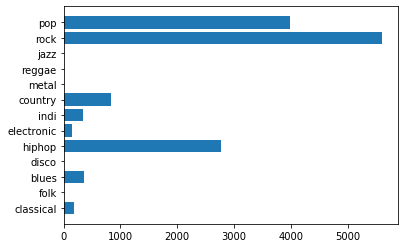

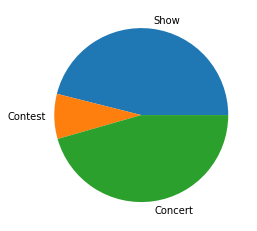

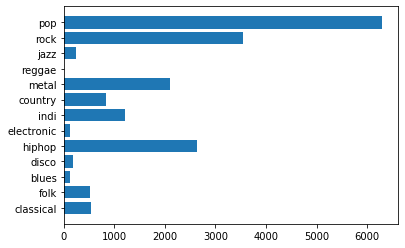

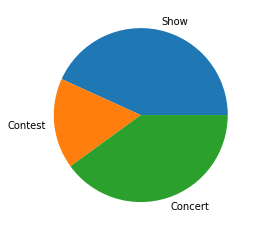

In [24]:
make_plots(os.path.join('Plots', 'tr_'), train)
make_plots(os.path.join('Plots', 'val_'), valid)
make_plots(os.path.join('Plots', 'ts_'), test)

In [26]:
train.to_csv(os.path.join('Data', 'train.csv'), encoding='cp1251')
valid.to_csv(os.path.join('Data', 'valid.csv'), encoding='cp1251')
test.to_csv(os.path.join('Data', 'test.csv'), encoding='cp1251')